In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_excel('clusters_6.xlsx')
df

,x,y,Cluster
0,0.800057,1.170918,0
1,0.605453,0.811143,0
2,1.408402,1.076423,0
3,1.104175,0.825922,0
4,1.220808,0.766965,0
...,...,...,...
205,-0.442722,-1.218108,2
206,-1.101110,-0.772025,2
207,-0.541766,-0.472535,2
208,-0.348663,-1.204386,2


[0 1 2]


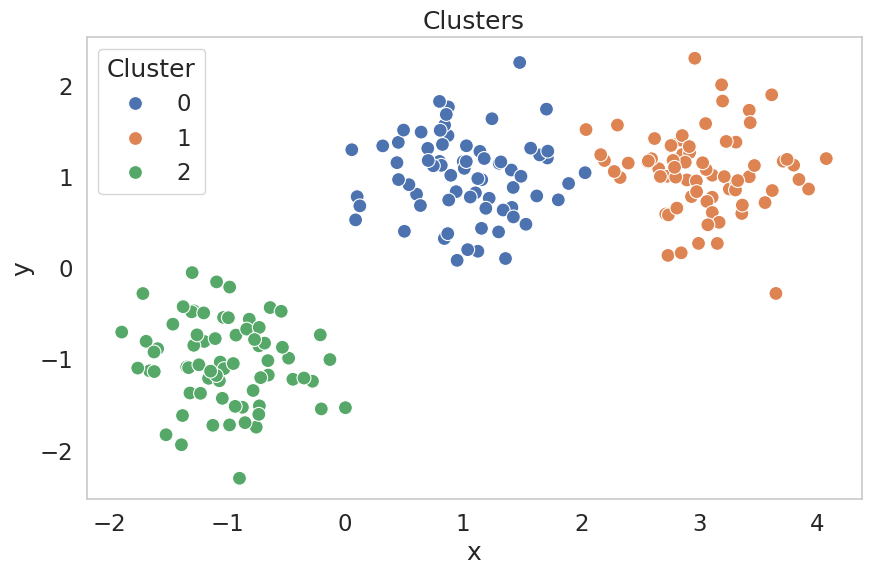

In [59]:
df.columns = ['x', 'y', 'cluster']
print(df['cluster'].unique())

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.5)
sns.scatterplot(data=df, x='x', y='y', hue='cluster', palette="deep", s=100)
plt.title('Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [60]:
_train_df = pd.read_csv('training_history.csv')
_train_df.head()

,epoch,train_error,val_error
0,0,0.503401,0.452381
1,1,0.455782,0.357143
2,2,0.374150,0.357143
3,3,0.367347,0.357143
4,4,0.333333,0.357143


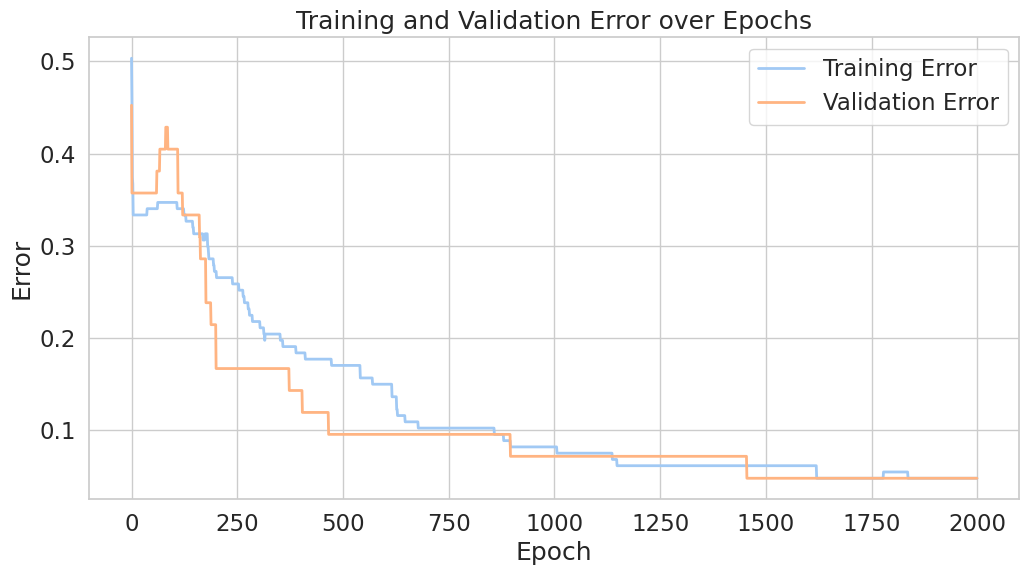

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(_train_df['epoch'], _train_df['train_error'], label='Training Error', linewidth=2)
plt.plot(_train_df['epoch'], _train_df['val_error'], label='Validation Error', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training and Validation Error over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
_train_predictions_df = pd.read_csv('train_predictions.csv')
_val_predictions_df = pd.read_csv('val_predictions.csv')
_test_predictions_df = pd.read_csv('test_predictions.csv')

_train_predictions_df.head()

,actual,predicted,feature_1,feature_2
0,1,1,1.150106,0.459717
1,2,2,-1.568958,-1.378956
2,1,1,0.673470,0.838598
3,1,1,1.078600,1.035410
4,2,2,-1.374892,-1.346660


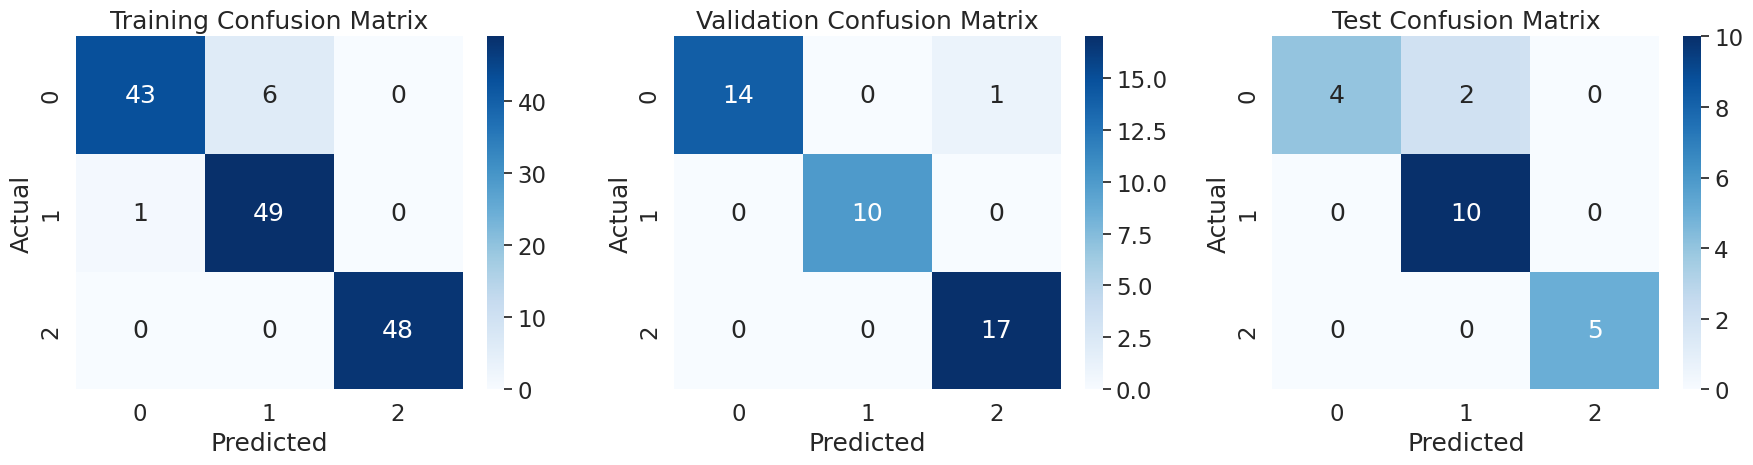

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cm_train = pd.crosstab(_train_predictions_df['actual'], _train_predictions_df['predicted'], 
                      rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Training Confusion Matrix')

cm_val = pd.crosstab(_val_predictions_df['actual'], _val_predictions_df['predicted'], 
                    rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Validation Confusion Matrix')

cm_test = pd.crosstab(_test_predictions_df['actual'], _test_predictions_df['predicted'], 
                     rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Test Confusion Matrix')

plt.tight_layout()
plt.show()

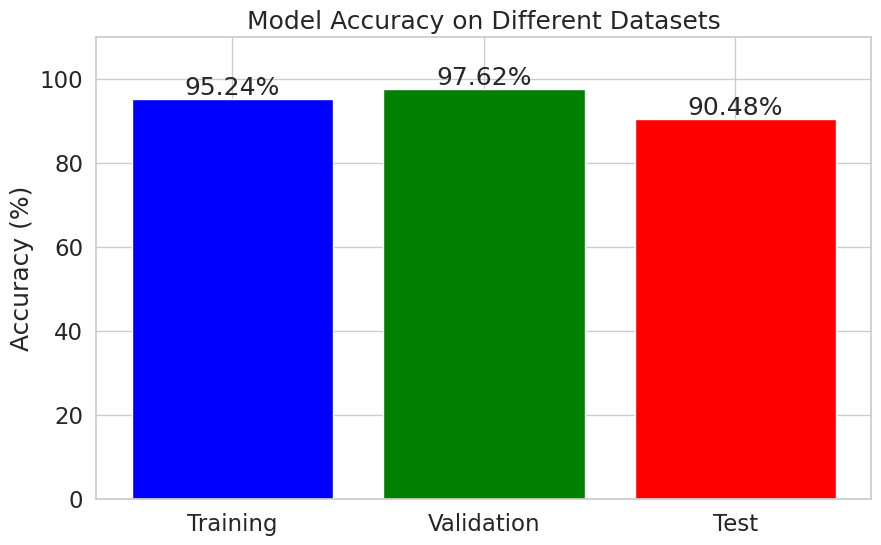

In [64]:
train_accuracy = (_train_predictions_df['actual'] == _train_predictions_df['predicted']).mean()
val_accuracy = (_val_predictions_df['actual'] == _val_predictions_df['predicted']).mean()
test_accuracy = (_test_predictions_df['actual'] == _test_predictions_df['predicted']).mean()

plt.figure(figsize=(10, 6))
accuracies = [train_accuracy*100, val_accuracy*100, test_accuracy*100]
plt.bar(['Training', 'Validation', 'Test'], accuracies, color=['blue', 'green', 'red'])
plt.ylim([0, 110])
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy on Different Datasets')

for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center')

plt.show()

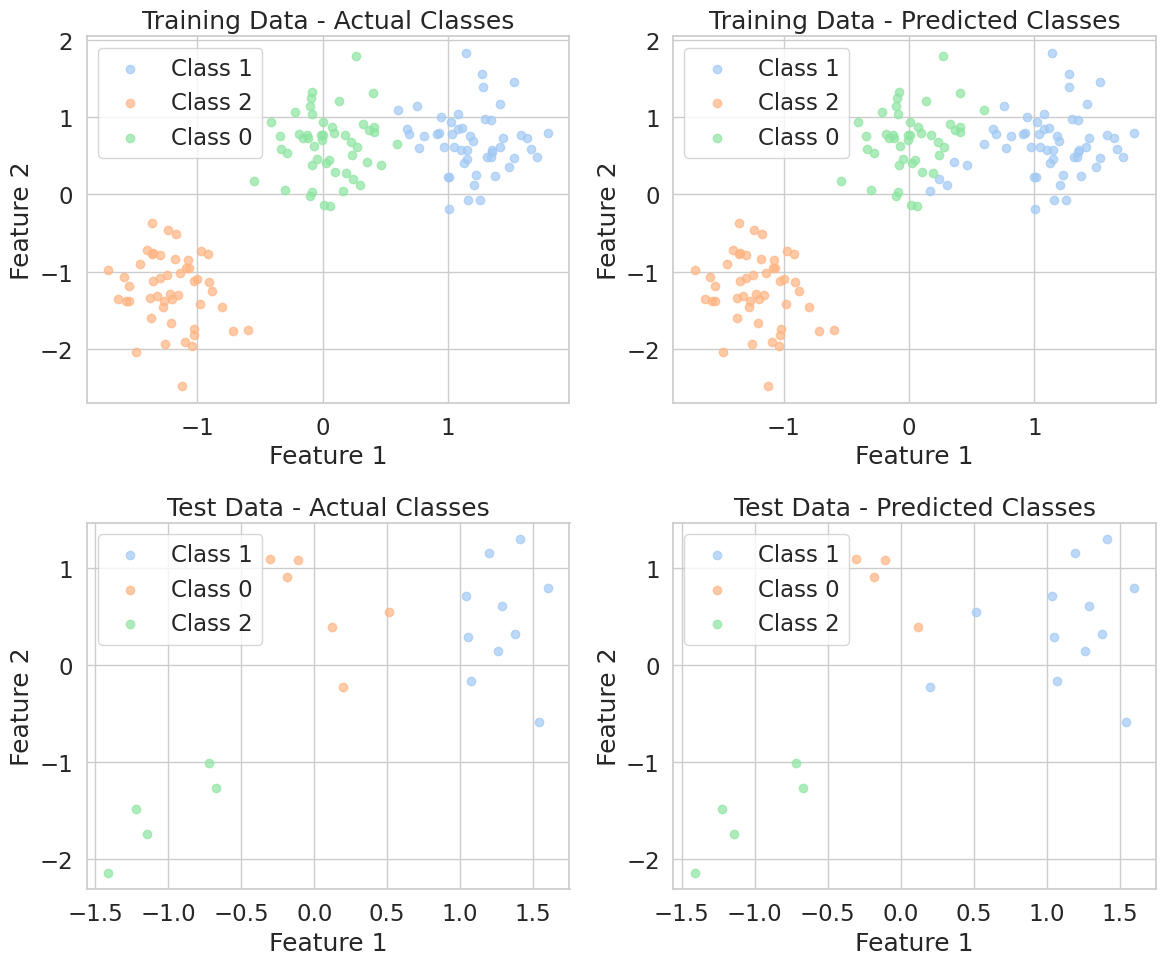

In [65]:
feature_cols = [col for col in _test_predictions_df.columns if col.startswith('feature_')]

if len(feature_cols) == 2:
    plt.figure(figsize=(12, 10))
    
    plt.subplot(2, 2, 1)
    for label in _train_predictions_df['actual'].unique():
        subset = _train_predictions_df[_train_predictions_df['actual'] == label]
        plt.scatter(subset['feature_1'], subset['feature_2'], label=f'Class {label}', alpha=0.7)
    plt.title('Training Data - Actual Classes')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 2, 2)
    for label in _train_predictions_df['predicted'].unique():
        subset = _train_predictions_df[_train_predictions_df['predicted'] == label]
        plt.scatter(subset['feature_1'], subset['feature_2'], label=f'Class {label}', alpha=0.7)
    plt.title('Training Data - Predicted Classes')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 2, 3)
    for label in _test_predictions_df['actual'].unique():
        subset = _test_predictions_df[_test_predictions_df['actual'] == label]
        plt.scatter(subset['feature_1'], subset['feature_2'], label=f'Class {label}', alpha=0.7)
    plt.title('Test Data - Actual Classes')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 2, 4)
    for label in _test_predictions_df['predicted'].unique():
        subset = _test_predictions_df[_test_predictions_df['predicted'] == label]
        plt.scatter(subset['feature_1'], subset['feature_2'], label=f'Class {label}', alpha=0.7)
    plt.title('Test Data - Predicted Classes')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
else:
    print(f"The dataset has {len(feature_cols)} features, which cannot be visualized in 2D directly.")

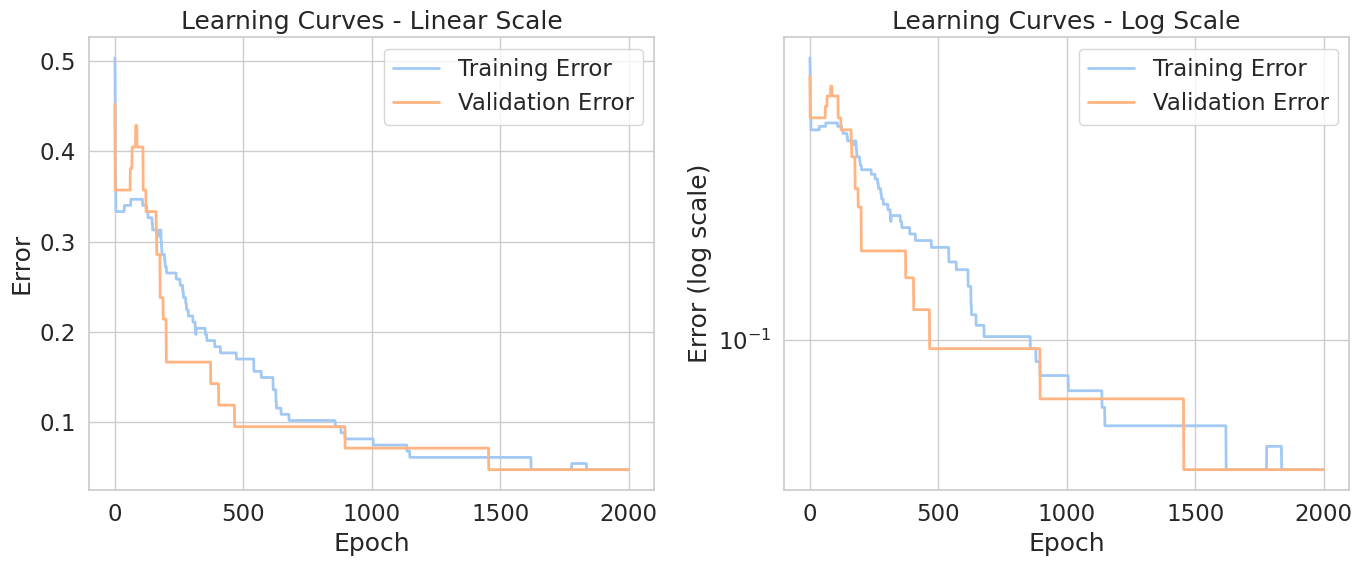

In [66]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(_train_df['epoch'], _train_df['train_error'], label='Training Error', linewidth=2)
plt.plot(_train_df['epoch'], _train_df['val_error'], label='Validation Error', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Learning Curves - Linear Scale')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogy(_train_df['epoch'], _train_df['train_error'], label='Training Error', linewidth=2)
plt.semilogy(_train_df['epoch'], _train_df['val_error'], label='Validation Error', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Error (log scale)')
plt.title('Learning Curves - Log Scale')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Number of misclassified samples in training set: 7 out of 147
Number of misclassified samples in validation set: 1 out of 42
Number of misclassified samples in test set: 2 out of 21


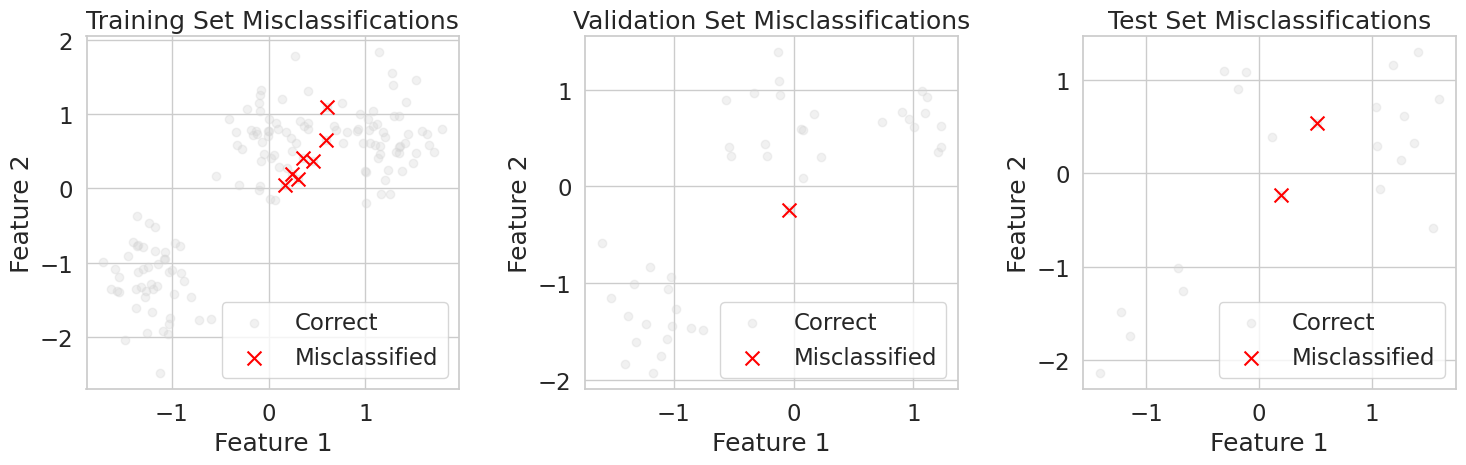

In [67]:
train_misclassified = _train_predictions_df[_train_predictions_df['actual'] != _train_predictions_df['predicted']]
val_misclassified = _val_predictions_df[_val_predictions_df['actual'] != _val_predictions_df['predicted']]
test_misclassified = _test_predictions_df[_test_predictions_df['actual'] != _test_predictions_df['predicted']]

print(f"Number of misclassified samples in training set: {len(train_misclassified)} out of {len(_train_predictions_df)}")
print(f"Number of misclassified samples in validation set: {len(val_misclassified)} out of {len(_val_predictions_df)}")
print(f"Number of misclassified samples in test set: {len(test_misclassified)} out of {len(_test_predictions_df)}")

if len(feature_cols) == 2:
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.scatter(_train_predictions_df['feature_1'], _train_predictions_df['feature_2'], 
                c='lightgrey', alpha=0.3, label='Correct')
    plt.scatter(train_misclassified['feature_1'], train_misclassified['feature_2'], 
                c='red', marker='x', s=100, label='Misclassified')
    plt.title('Training Set Misclassifications')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 3, 2)
    plt.scatter(_val_predictions_df['feature_1'], _val_predictions_df['feature_2'], 
                c='lightgrey', alpha=0.3, label='Correct')
    plt.scatter(val_misclassified['feature_1'], val_misclassified['feature_2'], 
                c='red', marker='x', s=100, label='Misclassified')
    plt.title('Validation Set Misclassifications')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 3, 3)
    plt.scatter(_test_predictions_df['feature_1'], _test_predictions_df['feature_2'], 
                c='lightgrey', alpha=0.3, label='Correct')
    plt.scatter(test_misclassified['feature_1'], test_misclassified['feature_2'], 
                c='red', marker='x', s=100, label='Misclassified')
    plt.title('Test Set Misclassifications')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()